In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

# Question 1

In [2]:
from src.stability.stability import logistic_regression
from src.stability.util import load_csv

print("==== Training model on data set A ====")
Xa, Ya = load_csv("src/stability/ds1_a.csv", add_intercept=True)
thetasA = logistic_regression(Xa, Ya)

print("\n==== Training model on data set B ====")
Xb, Yb = load_csv("src/stability/ds1_b.csv", add_intercept=True)
thetasB = logistic_regression(Xb, Yb)


==== Training model on data set A ====
Finished 10000 iterations, grad [-4.15154546e-06  4.27822247e-06  4.08456455e-06], theta [-20.81394174  21.45250215  19.85155266]
Finished 20000 iterations, grad [-3.06369558e-10  3.15718831e-10  3.01427941e-10], theta [-20.81437785  21.45295156  19.85198173]
Finished 30000 iterations, grad [-2.05622084e-14  2.73101064e-14  1.90783804e-14], theta [-20.81437788  21.45295159  19.85198176]
Converged in 30374 iterations, theta [-20.81437788  21.45295159  19.85198176]

==== Training model on data set B ====
Finished 10000 iterations, grad [-0.01939888  0.01935515  0.01946073], theta [-52.74109217  52.92982273  52.69691453]
Finished 20000 iterations, grad [-0.01254117  0.01252944  0.01257037], theta [-68.10040977  68.26496086  68.09888223]
Finished 30000 iterations, grad [-0.00960445  0.00960554  0.00961981], theta [-79.01759142  79.17745526  79.03755803]
Finished 40000 iterations, grad [-0.00790652  0.00791523  0.00791444], theta [-87.70771189  87.8727

<IPython.core.display.Javascript object>

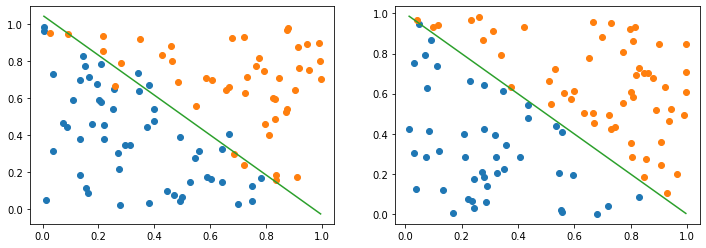

<IPython.core.display.Javascript object>

In [3]:
def plot_decision_boundary(X, thetas, ax):
    x1 = X[:, 1]
    y = (-thetas[0] - x1 * thetas[1]) / thetas[2]
    x1, y = zip(*sorted(zip(x1, y), key=lambda x: x[1]))
    ax.plot(x1, y)


fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for label in [0, 1]:
    ax[0].plot(Xa[:, 1][Ya == label], Xa[:, 2][Ya == label], "o", label=label)
plot_decision_boundary(Xa, thetasA, ax[0])

for label in [0, 1]:
    ax[1].plot(Xb[:, 1][Yb == label], Xb[:, 2][Yb == label], "o", label=label)
plot_decision_boundary(Xb, thetasB, ax[1])

plt.plot()
plt.show()

1. Training logistics on dataset B take significantly many more iterations than dataset A
2. Dataset B is perfectly linearly separable. Therefore, after a few iterations, we would observe $|\theta^T x^{(i)}| >= 0$ for all examples. This means that the solution that the gradient descent would be searching for is simply $\theta$ that push the probability to both 0 and 1 as much as possible i.e. to drive the loss to 0 and this can been from $|\theta|$ that keeps on increasing.
3. i. Simply using a different constant learning rate (> 0) will not help because every gradient step would still push the thetas such that p close to 0 or 1.  
    ii. As $t \rightarrow \infty$, learning_rate $\rightarrow 0$, thus this would cause the algorithm to converge.  
    iii. Linear scaling will not stop the gradient step to keep pushing the p to 0 or 1.  
    iv. This will lead to convergence because now there is a tradeoff between the magnitude of $\theta$ and the log loss.  
    v. Yes, because this will cause the data to be no longer perfectly linearly separable although not in all cases.

# Question 2

In [4]:
from src.spam.util import *
from src.spam.spam import *

<IPython.core.display.Javascript object>

In [5]:
train_messages, train_labels = load_spam_dataset("src/spam/spam_train.tsv")
val_messages, val_labels = load_spam_dataset("src/spam/spam_val.tsv")
test_messages, test_labels = load_spam_dataset("src/spam/spam_test.tsv")

dictionary = create_dictionary(train_messages)

print("Size of dictionary: ", len(dictionary))

write_json("spam_dictionary", dictionary)

train_matrix = transform_text(train_messages, dictionary)

np.savetxt("spam_sample_train_matrix", train_matrix[:100, :])

val_matrix = transform_text(val_messages, dictionary)
test_matrix = transform_text(test_messages, dictionary)

naive_bayes_model = fit_naive_bayes_model(train_matrix, train_labels)

naive_bayes_predictions = predict_from_naive_bayes_model(naive_bayes_model, test_matrix)

np.savetxt("spam_naive_bayes_predictions", naive_bayes_predictions)

naive_bayes_accuracy = np.mean(naive_bayes_predictions == test_labels)

print(
    "Naive Bayes had an accuracy of {} on the testing set".format(naive_bayes_accuracy)
)

Size of dictionary:  1722
Naive Bayes had an accuracy of 0.982078853046595 on the testing set


<IPython.core.display.Javascript object>

In [6]:
top_5_words = get_top_five_naive_bayes_words(naive_bayes_model, dictionary)

print("The top 5 indicative words for Naive Bayes are: ", top_5_words)

write_json("spam_top_indicative_words", top_5_words)

The top 5 indicative words for Naive Bayes are:  ['urgent!', 'tone', 'prize', 'won', 'claim']


<IPython.core.display.Javascript object>

In [7]:
optimal_radius = compute_best_svm_radius(
    train_matrix, train_labels, val_matrix, val_labels, [0.01, 0.1, 1, 10]
)

write_json("spam_optimal_radius", optimal_radius)

print("The optimal SVM radius was {}".format(optimal_radius))

The optimal SVM radius was 0.1


<IPython.core.display.Javascript object>

In [8]:
svm_predictions = train_and_predict_svm(
    train_matrix, train_labels, test_matrix, optimal_radius
)

svm_accuracy = np.mean(svm_predictions == test_labels)

print("The SVM model had an accuracy of {} on the testing set".format(svm_accuracy))

The SVM model had an accuracy of 0.9695340501792115 on the testing set


<IPython.core.display.Javascript object>

# Question 3

![3a](answers/3a.png)

![3b](answers/3b.png)

![3c](answers/3c.png)

![3d](answers/3d.png)

![3e](answers/3e.png)

- https://stats.stackexchange.com/questions/48509/proof-of-closeness-of-kernel-functions-under-pointwise-product/50289
- https://www.quora.com/How-do-I-formally-proof-the-product-of-two-kernels-is-a-kernel-If-K1-x-x1-and-K2-x-x2-are-both-kernel-function-then-K1-x-x1-K2-x-x2-is-also-a-kernel

![3f](answers/3f.png)

![3g](answers/3g.png)

![3h](answers/3h.png)

# Question 4

## 4.a

### i

Since computing $\phi(x)$ and the linear combination of $\phi(x)$ could be computationally expensive, kernel trick is introduced. This basically means that we assume

$$ \theta = \sum_{i=1}^n \beta_i \phi(x^i) $$

and when doing the inference, we simply need to compute the linear combination of $ K(x_i, x_j) $ for new sample $x_j$ where $K$ is a computationally tractable kernel function.

Therefore, we need to store arrays of both $ \beta $ and $ X $ that have been used to update the $\theta$.

### ii

\begin{align*}
    {\theta^{(i)}}^T \phi(x^{(i+1)}) &= \sum_{j=1}^i \beta_j \phi(x^j) \phi(x^{(i+1)}) \\
    &= \sum_{j=1}^i \beta_j K(x^j, x^{(i+1)})
\end{align*}

### iii

New update rule, for $ i = 0, \dots, n-1$:

$$ \beta^{(i+1)} := \beta^{(i)} + \alpha \Big(y^{(i)} - \sum_{j=1}^i \beta_j K(x^j, x^{(i+1)}) \Big)$$

In [9]:
from src.perceptron.perceptron import *

<IPython.core.display.Javascript object>

test accuracy: 0.525


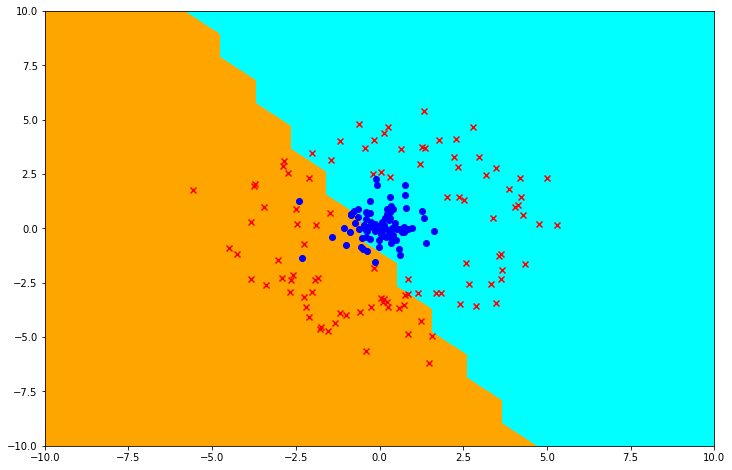

<IPython.core.display.Javascript object>

In [10]:
train_perceptron("dot", dot_kernel, 0.5)


test accuracy: 0.92


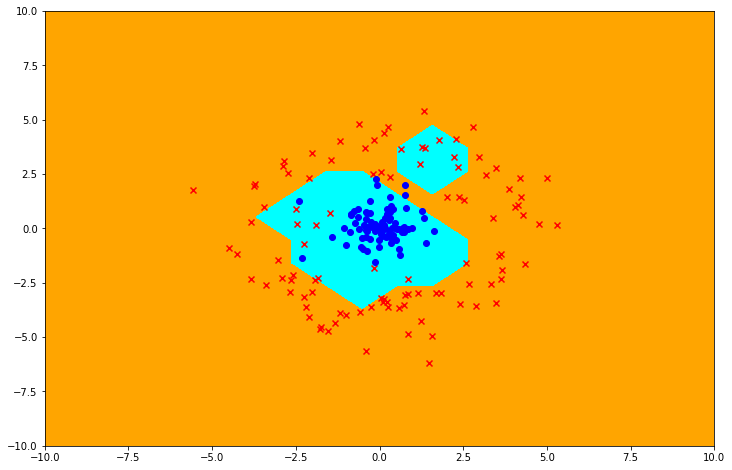

<IPython.core.display.Javascript object>

In [11]:
train_perceptron("rbf", rbf_kernel, 0.5)


test accuracy: 0.48


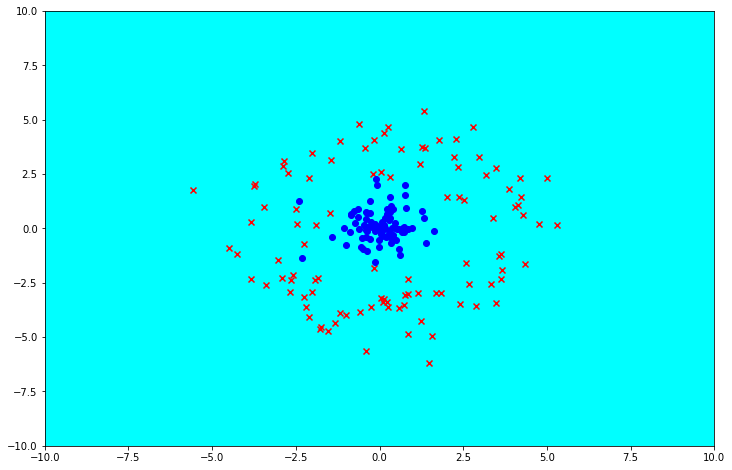

<IPython.core.display.Javascript object>

In [12]:
train_perceptron("non_psd", non_psd_kernel, 0.5)


## 4.c

1. Dot kernel fails because the data is non-linear, therefore, the decision boundary over the original feature will not perform well.
2. RBF kernel performs much better because the kernel transforms the original feature to a new feature space such that the data could be separated using a linear decision boundary.
3. The selected non-PSD kernel fails because all the new examples are not close enough to any datapoints used for training. Therefore, the dot products all result in zeros which simply give positive for every examples.

# Question 5 

First things first, note that

$$ L^{(i)} = \text{CE}(y^{(i)}, \hat{y}^{(i)}) = - \sum_{k=1}^K y_k \log{\hat{y_k}} = -\log{\hat{y_l}}$$

where $\hat{y_l}$ is the prediction for the ground-truth class. From here on, we will assume every derivation is particular to example $ (i) $ for readability.

Taking derivative of $ L^{(i)} $ and applying chain rules

\begin{align}
    \nabla_{z} L &= - \frac{1}{y_l} \nabla_{z} y_l
\end{align}

Also note that, 

$$ \hat{y_l} = \frac{\exp{(z_l)}}{\sum_{j=1}^K\exp{(z_j)}}  $$

Therefore,

\begin{align}
    \frac{\partial \hat{y_l} }{\partial z_j} &= \hat{y_l}(1 - \hat{y_l}), &\quad l = j \\
    \frac{\partial \hat{y_l} }{\partial z_j} &= -\hat{y_l}\hat{y_j}, &\quad l \neq j
\end{align}

Substituting the results from the last equation, we get

\begin{align}
    \frac{\partial L}{\partial z_j} &= \hat{y_l} - 1 & \quad l = j\\
    \frac{\partial L}{\partial z_j} &= \hat{y_j} & \quad l \neq j
\end{align}

This is equivalent to saying that

$$ \nabla_z \text{CE}(y, \hat{y}) = \hat{y} - y $$

In [13]:
from src.mnist.nn import *

<IPython.core.display.Javascript object>

In [14]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Taken from cs231n assignments.
    
    a naive implementation of numerical gradient of f at x
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """

    fx = f(x)  # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h  # increment by h
        fxph = f(x)  # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x)  # evaluate f(x - h)
        x[ix] = oldval  # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h)  # the slope
        if verbose:
            print(ix, grad[ix])
        it.iternext()  # step to next dimension

    return grad


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def forward_prop_w(X, y, w, name):
    weights = params.copy()
    weights[name] = w
    return forward_prop(X, y, weights)


<IPython.core.display.Javascript object>

In [15]:
x = np.random.randn(3, 5)
labels = np.random.randn(3, 10).argmax(axis=1)
y = np.zeros((3, 10))
y[np.arange(y.shape[0]), labels] = 1.0

params = get_initial_params(x.shape[1], 16, y.shape[1])

dW2 = eval_numerical_gradient(lambda w: forward_prop_w(x, y, w, "W2")[2], params["W2"])
db2 = eval_numerical_gradient(lambda w: forward_prop_w(x, y, w, "b2")[2], params["b2"])
dW1 = eval_numerical_gradient(lambda w: forward_prop_w(x, y, w, "W1")[2], params["W1"])
db1 = eval_numerical_gradient(lambda w: forward_prop_w(x, y, w, "b1")[2], params["b1"])

grads = backward_prop(x, y, params, forward_prop)

print("dW2 error:", rel_error(dW2, grads["W2"]))
print("db2 error:", rel_error(db2, grads["b2"]))
print("dW1 error:", rel_error(dW1, grads["W1"]))
print("db1 error:", rel_error(db1, grads["b1"]))

dW2 error: 2.1416112986937787e-08
db2 error: 2.7996449986690312e-09
dW1 error: 4.789438274751909e-07
db1 error: 3.2567964537702927e-08


<IPython.core.display.Javascript object>

In [16]:
np.random.seed(100)
train_data, train_labels = read_data(
    "src/mnist/images_train.csv", "src/mnist/labels_train.csv"
)
train_labels = one_hot_labels(train_labels)
p = np.random.permutation(60000)
train_data = train_data[p, :]
train_labels = train_labels[p, :]

dev_data = train_data[0:10000, :]
dev_labels = train_labels[0:10000, :]
train_data = train_data[10000:, :]
train_labels = train_labels[10000:, :]

mean = np.mean(train_data)
std = np.std(train_data)
train_data = (train_data - mean) / std
dev_data = (dev_data - mean) / std

test_data, test_labels = read_data(
    "src/mnist/images_test.csv", "src/mnist/labels_test.csv"
)
test_labels = one_hot_labels(test_labels)
test_data = (test_data - mean) / std

all_data = {"train": train_data, "dev": dev_data, "test": test_data}

all_labels = {
    "train": train_labels,
    "dev": dev_labels,
    "test": test_labels,
}

<IPython.core.display.Javascript object>

For model baseline, got accuracy: 0.793400
For model regularized, got accuracy: 0.883400


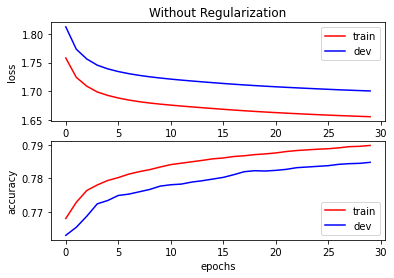

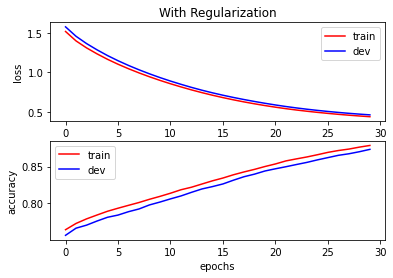

<IPython.core.display.Javascript object>

In [17]:
num_epochs = 30

baseline_acc = run_train_test(
    "baseline", all_data, all_labels, backward_prop, num_epochs, plot
)

reg_acc = run_train_test(
    "regularized",
    all_data,
    all_labels,
    lambda a, b, c, d: backward_prop_regularized(a, b, c, d, reg=0.0001),
    num_epochs,
    plot,
)

As observed from the plots above, the model training accuracy is much higher than dev accuracy without regularization which indicates some degree of overfitting in our model. After adding the regularization, the training and dev accuracy are much closer because it reduces the hypothesis space that we could generate our parameters from.

# Question 6

![6a](answers/6a.png)

![6b](answers/6b.png)

![6c](answers/6c.png)

![6d](answers/6d.png)